In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('../data/onlinefraud.csv')

In [6]:
df[df['amount'] == 408939.16]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5067912,354,CASH_OUT,408939.16,C760310344,323798.0,0.0,C1393838280,2060379.55,2469318.71,0,0


In [3]:
# Percentage of fraud
fraud_percentage = df['isFraud'].mean() * 100

In [4]:
print(f"Percentage of fraudulent transactions: {fraud_percentage:.2f}%")

Percentage of fraudulent transactions: 0.13%


In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   step                        int64  
 1   type                        object 
 2   amount                      float64
 3   nameOrig                    object 
 4   oldbalanceOrg               float64
 5   newbalanceOrig              float64
 6   nameDest                    object 
 7   oldbalanceDest              float64
 8   newbalanceDest              float64
 9   isFraud                     int64  
 10  isFlaggedFraud              int64  
 11  amountToOldBalanceOrgRatio  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 582.5+ MB


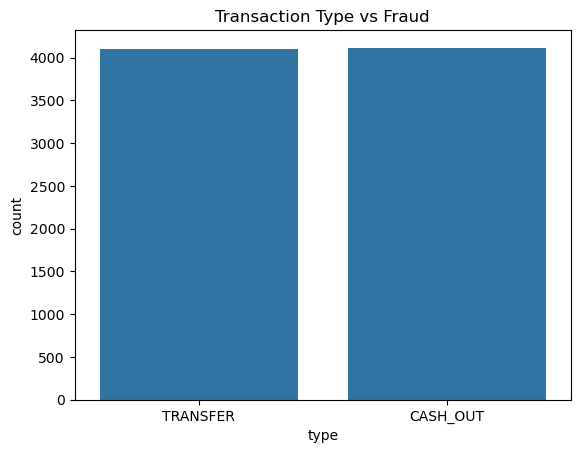

In [5]:
# Type vs isFraud
sns.countplot(data=df[df['isFraud']==1], x='type')
plt.title('Transaction Type vs Fraud')
plt.show()

In [27]:
df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 253.6+ MB


In [7]:
# Feature engineer amount to current balance ratio
df['amountToOldBalanceOrgRatio'] = df['amount'] / df['oldbalanceOrg']

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amountToOldBalanceOrgRatio
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,1.000000
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,1.000000
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,14.951644
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,305.404681
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,28.766580


In [14]:
df.isnull().sum()

step                                0
type                                0
amount                              0
nameOrig                            0
oldbalanceOrg                       0
newbalanceOrig                      0
nameDest                            0
oldbalanceDest                      0
newbalanceDest                      0
isFraud                             0
isFlaggedFraud                      0
amountToOldBalanceOrgRatio    1308582
dtype: int64

In [8]:
df = df.replace([np.inf, -np.inf], np.nan)
# df = df.dropna(subset=["amountToOldBalanceOrgRatio"])

In [28]:
df["amountToOldBalanceOrgRatio"] = df["amountToOldBalanceOrgRatio"].fillna(df["amountToOldBalanceOrgRatio"].median())

KeyError: 'amountToOldBalanceOrgRatio'

In [21]:
df = df.dropna(subset=["amountToOldBalanceOrgRatio"])

In [7]:
df.isnull().sum()

step                          0
type                          0
amount                        0
nameOrig                      0
oldbalanceOrg                 0
newbalanceOrig                0
nameDest                      0
oldbalanceDest                0
newbalanceDest                0
isFraud                       0
isFlaggedFraud                0
amountToOldBalanceOrgRatio    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   step                        int64  
 1   type                        object 
 2   amount                      float64
 3   nameOrig                    object 
 4   oldbalanceOrg               float64
 5   newbalanceOrig              float64
 6   nameDest                    object 
 7   oldbalanceDest              float64
 8   newbalanceDest              float64
 9   isFraud                     int64  
 10  isFlaggedFraud              int64  
 11  amountToOldBalanceOrgRatio  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 582.5+ MB


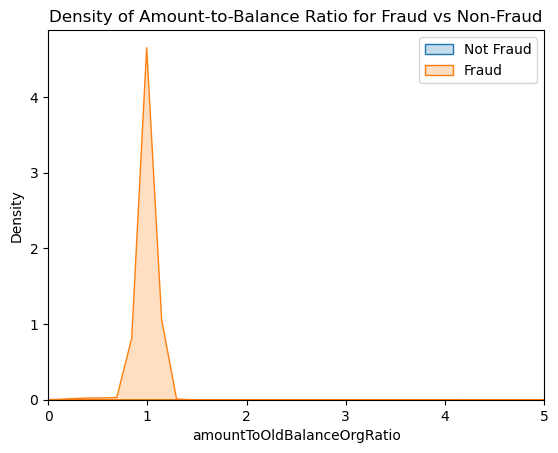

In [18]:
# amountToOldBalanceOrgRatio vs isFraud
sns.kdeplot(df[df["isFraud"]==0]["amountToOldBalanceOrgRatio"], label="Not Fraud", fill=True)
sns.kdeplot(df[df["isFraud"]==1]["amountToOldBalanceOrgRatio"], label="Fraud", fill=True)
plt.xlim(0, 5)
plt.title("Density of Amount-to-Balance Ratio for Fraud vs Non-Fraud")
plt.legend()
plt.show()

In [29]:
def extract_time_features(step: int, type: str):
    day = step // 24
    if type == "hour":
        return step % 24
    elif type == "day":
        return day
    elif type == "weekend":
        return 1 if (day % 7) in [5, 6] else 0

In [30]:
# Feature engineer temporal features
df['hourOfDay'] = df['step'].apply(lambda x: extract_time_features(x, 'hour'))
df['dayOfMonth'] = df['step'].apply(lambda x: extract_time_features(x, 'day'))
df['isWeekend'] = df['step'].apply(lambda x: extract_time_features(x, 'weekend'))

In [31]:
daily_sum = df.groupby(["nameOrig", "dayOfMonth"])["amount"].sum().reset_index(name="dailyVolume")

In [32]:
df = df.merge(daily_sum, on=["nameOrig", "dayOfMonth"], how="left")

In [33]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hourOfDay,dayOfMonth,isWeekend,dailyVolume
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,1,0,0,181.00
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,1,0,0,181.00
2,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,1,0,0,229133.94
3,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1,0,0,215310.30
4,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1,0,0,311685.89


In [34]:
df = df.sort_values(by=["nameOrig", "dayOfMonth"])

In [35]:
# Feature engineer average daily transaction volume (should be precomputed from a db e.g redis)
df["cumulativeVolume"] = df.groupby("nameOrig")["dailyVolume"].cumsum()

# Number of days so far
df["dayCount"] = df.groupby("nameOrig")["dayOfMonth"].cumcount() + 1

# Average daily volume up to now
df["avgDailyVolumeSoFar"] = df["cumulativeVolume"] / df["dayCount"]

# Shift by one day to prevent data leakage (exclude current day's transactions)
df["avgDailyVolumeBeforeTxn"] = (
    df.groupby("nameOrig")["avgDailyVolumeSoFar"].shift(1)
)

In [36]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hourOfDay,dayOfMonth,isWeekend,dailyVolume,cumulativeVolume,dayCount,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn
1400497,249,CASH_OUT,244486.46,C1000000639,8946.00,0.00,C785826240,526950.37,771436.84,0,0,9,10,0,244486.46,244486.46,1,244486.46,NaN
1990093,327,CASH_OUT,211189.64,C1000004053,0.00,0.00,C1128041097,2609840.34,2821029.98,0,0,15,13,1,211189.64,211189.64,1,211189.64,NaN
375786,41,CASH_OUT,93865.13,C1000004530,351422.72,257557.59,C1643839147,178083.14,271948.26,0,0,17,1,0,93865.13,93865.13,1,93865.13,NaN
1237823,226,TRANSFER,3228390.11,C1000005353,24996.00,0.00,C292963054,878327.64,4106717.75,0,0,10,9,0,3228390.11,3228390.11,1,3228390.11,NaN
969635,185,CASH_OUT,233109.79,C1000005555,20623.00,0.00,C1091802600,0.00,233109.79,0,0,17,7,0,233109.79,233109.79,1,233109.79,NaN


In [13]:
df.isnull().sum()

step                             0
type                             0
amount                           0
nameOrig                         0
oldbalanceOrg                    0
newbalanceOrig                   0
nameDest                         0
oldbalanceDest                   0
newbalanceDest                   0
isFraud                          0
isFlaggedFraud                   0
hourOfDay                        0
dayOfMonth                       0
isWeekend                        0
dailyVolume                      0
cumulativeVolume                 0
dayCount                         0
avgDailyVolumeSoFar              0
avgDailyVolumeBeforeTxn    2768630
dtype: int64

In [37]:
df["avgDailyVolumeBeforeTxn"] = df["avgDailyVolumeBeforeTxn"].fillna(0)

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hourOfDay,dayOfMonth,isWeekend,dailyVolume,cumulativeVolume,dayCount,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn
1400497,249,CASH_OUT,244486.46,C1000000639,8946.00,0.00,C785826240,526950.37,771436.84,0,0,9,10,0,244486.46,244486.46,1,244486.46,0.0
1990093,327,CASH_OUT,211189.64,C1000004053,0.00,0.00,C1128041097,2609840.34,2821029.98,0,0,15,13,1,211189.64,211189.64,1,211189.64,0.0
375786,41,CASH_OUT,93865.13,C1000004530,351422.72,257557.59,C1643839147,178083.14,271948.26,0,0,17,1,0,93865.13,93865.13,1,93865.13,0.0
1237823,226,TRANSFER,3228390.11,C1000005353,24996.00,0.00,C292963054,878327.64,4106717.75,0,0,10,9,0,3228390.11,3228390.11,1,3228390.11,0.0
969635,185,CASH_OUT,233109.79,C1000005555,20623.00,0.00,C1091802600,0.00,233109.79,0,0,17,7,0,233109.79,233109.79,1,233109.79,0.0


In [38]:
df["amountToAvgVolumeRatio"] = (
    df["amount"] / (df["avgDailyVolumeBeforeTxn"] + 1e-6)
)

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hourOfDay,dayOfMonth,isWeekend,dailyVolume,cumulativeVolume,dayCount,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio
1400497,249,CASH_OUT,244486.46,C1000000639,8946.00,0.00,C785826240,526950.37,771436.84,0,0,9,10,0,244486.46,244486.46,1,244486.46,0.0,2.444865e+11
1990093,327,CASH_OUT,211189.64,C1000004053,0.00,0.00,C1128041097,2609840.34,2821029.98,0,0,15,13,1,211189.64,211189.64,1,211189.64,0.0,2.111896e+11
375786,41,CASH_OUT,93865.13,C1000004530,351422.72,257557.59,C1643839147,178083.14,271948.26,0,0,17,1,0,93865.13,93865.13,1,93865.13,0.0,9.386513e+10
1237823,226,TRANSFER,3228390.11,C1000005353,24996.00,0.00,C292963054,878327.64,4106717.75,0,0,10,9,0,3228390.11,3228390.11,1,3228390.11,0.0,3.228390e+12
969635,185,CASH_OUT,233109.79,C1000005555,20623.00,0.00,C1091802600,0.00,233109.79,0,0,17,7,0,233109.79,233109.79,1,233109.79,0.0,2.331098e+11


<Axes: xlabel='isFraud', ylabel='amountToAvgVolumeRatio'>

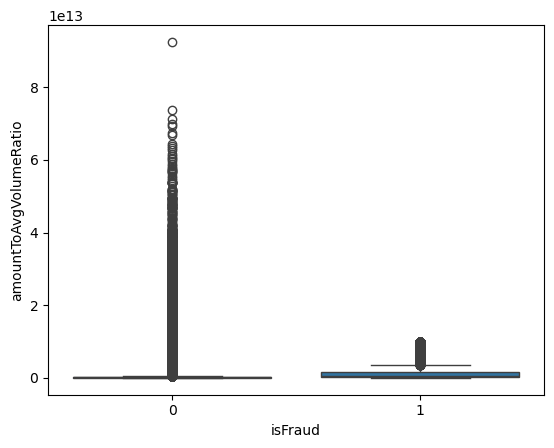

In [32]:
sns.boxplot(data=df, x="isFraud", y="amountToAvgVolumeRatio")

In [39]:
df["isFirstTransaction"] = (
    df.groupby("nameOrig").cumcount() == 0
).astype(int)

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,hourOfDay,dayOfMonth,isWeekend,dailyVolume,cumulativeVolume,dayCount,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio,isFirstTransaction
1400497,249,CASH_OUT,244486.46,C1000000639,8946.00,0.00,C785826240,526950.37,771436.84,0,...,9,10,0,244486.46,244486.46,1,244486.46,0.0,2.444865e+11,1
1990093,327,CASH_OUT,211189.64,C1000004053,0.00,0.00,C1128041097,2609840.34,2821029.98,0,...,15,13,1,211189.64,211189.64,1,211189.64,0.0,2.111896e+11,1
375786,41,CASH_OUT,93865.13,C1000004530,351422.72,257557.59,C1643839147,178083.14,271948.26,0,...,17,1,0,93865.13,93865.13,1,93865.13,0.0,9.386513e+10,1
1237823,226,TRANSFER,3228390.11,C1000005353,24996.00,0.00,C292963054,878327.64,4106717.75,0,...,10,9,0,3228390.11,3228390.11,1,3228390.11,0.0,3.228390e+12,1
969635,185,CASH_OUT,233109.79,C1000005555,20623.00,0.00,C1091802600,0.00,233109.79,0,...,17,7,0,233109.79,233109.79,1,233109.79,0.0,2.331098e+11,1


In [36]:
# transactions per user per day
daily_counts = (
    df.groupby(['nameOrig', 'dayOfMonth'])
    .size()
    .reset_index(name='dailyTxnCount')
)

In [37]:
# compute cumulative totals and unique days
daily_counts['cumTxn'] = daily_counts.groupby('nameOrig')['dailyTxnCount'].cumsum().shift(fill_value=0)
daily_counts['dayIndex'] = daily_counts.groupby('nameOrig').cumcount()

In [38]:
# compute avgDailyTransactionCount for each (user, day)
daily_counts['avgDailyTransactionCount'] = (
    daily_counts['cumTxn'] / daily_counts['dayIndex'].replace(0, pd.NA)
)

In [39]:
df = df.merge(
    daily_counts[['nameOrig', 'dayOfMonth', 'avgDailyTransactionCount']],
    on=['nameOrig', 'dayOfMonth'],
    how='left'
)

In [19]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,dayOfMonth,isWeekend,dailyVolume,cumulativeVolume,dayCount,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio,isFirstTransaction,avgDailyTransactionCount
0,249,CASH_OUT,244486.46,C1000000639,8946.00,0.00,C785826240,526950.37,771436.84,0,...,10,0,244486.46,244486.46,1,244486.46,0.0,2.444865e+11,1,<NA>
1,217,PAYMENT,3170.28,C1000001337,58089.00,54918.72,M216466820,0.00,0.00,0,...,9,0,3170.28,3170.28,1,3170.28,0.0,3.170280e+09,1,<NA>
2,46,PAYMENT,8424.74,C1000001725,783.00,0.00,M1974356374,0.00,0.00,0,...,1,0,8424.74,8424.74,1,8424.74,0.0,8.424740e+09,1,<NA>
3,231,CASH_IN,261877.19,C1000002591,7596.00,269473.19,C503690069,1126627.70,864750.51,0,...,9,0,261877.19,261877.19,1,261877.19,0.0,2.618772e+11,1,<NA>
4,167,CASH_IN,20528.65,C1000003372,2302074.12,2322602.77,C1840417793,82696.17,62167.52,0,...,6,1,20528.65,20528.65,1,20528.65,0.0,2.052865e+10,1,<NA>


In [40]:
df['avgDailyTransactionCount'] = df['avgDailyTransactionCount'].fillna(0)

/tmp/ipykernel_329521/3530781225.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['avgDailyTransactionCount'] = df['avgDailyTransactionCount'].fillna(0)


In [43]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,dayOfMonth,isWeekend,dailyVolume,cumulativeVolume,dayCount,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio,isFirstTransaction,avgDailyTransactionCount
0,249,1,244486.46,C1000000639,8946.00,0.00,C785826240,526950.37,771436.84,0,...,10,0,244486.46,244486.46,1,244486.46,0.0,2.444865e+11,1,0.0
1,217,0,3170.28,C1000001337,58089.00,54918.72,M216466820,0.00,0.00,0,...,9,0,3170.28,3170.28,1,3170.28,0.0,3.170280e+09,1,0.0
2,46,0,8424.74,C1000001725,783.00,0.00,M1974356374,0.00,0.00,0,...,1,0,8424.74,8424.74,1,8424.74,0.0,8.424740e+09,1,0.0
3,231,0,261877.19,C1000002591,7596.00,269473.19,C503690069,1126627.70,864750.51,0,...,9,0,261877.19,261877.19,1,261877.19,0.0,2.618772e+11,1,0.0
4,167,0,20528.65,C1000003372,2302074.12,2322602.77,C1840417793,82696.17,62167.52,0,...,6,1,20528.65,20528.65,1,20528.65,0.0,2.052865e+10,1,0.0


/tmp/ipykernel_329521/3033198056.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['isFraud']==0], x='avgDailyTransactionCount', label='Not Fraud', shade=True)
/tmp/ipykernel_329521/3033198056.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['isFraud']==1], x='avgDailyTransactionCount', label='Fraud', shade=True)


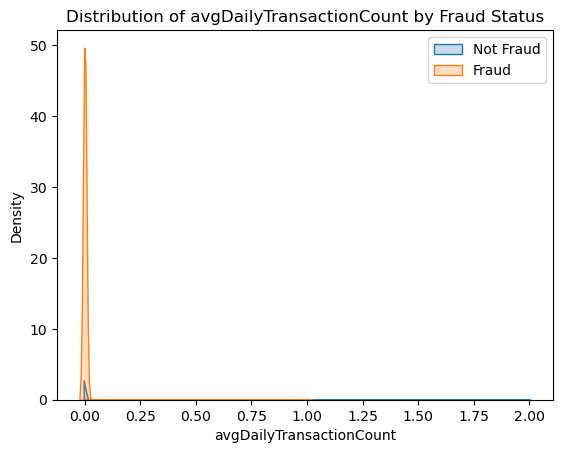

In [41]:
sns.kdeplot(data=df[df['isFraud']==0], x='avgDailyTransactionCount', label='Not Fraud', shade=True)
sns.kdeplot(data=df[df['isFraud']==1], x='avgDailyTransactionCount', label='Fraud', shade=True)
plt.legend()
plt.title('Distribution of avgDailyTransactionCount by Fraud Status')
plt.show()


In [42]:
from scipy.stats import ttest_ind

fraud = df[df['isFraud']==1]['avgDailyTransactionCount']
non_fraud = df[df['isFraud']==0]['avgDailyTransactionCount']

t_stat, p_val = ttest_ind(fraud, non_fraud, equal_var=False)
print(f"T-stat: {t_stat:.2f}, P-value: {p_val:.4f}")


T-stat: 1.59, P-value: 0.1119


<Axes: xlabel='amountToAvgVolumeRatio', ylabel='avgDailyTransactionCount'>

/home/dosu/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/dosu/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


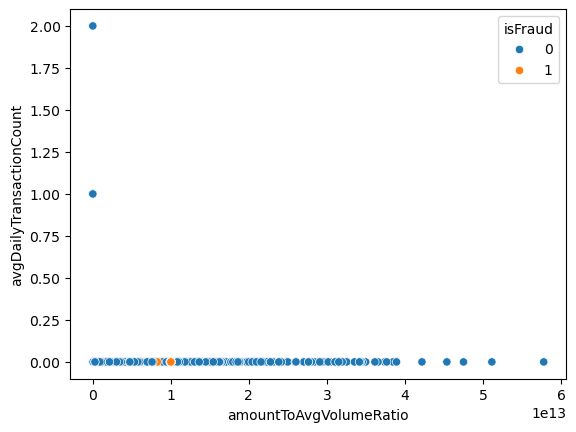

In [30]:
sns.scatterplot(x='amountToAvgVolumeRatio', y='avgDailyTransactionCount', hue='isFraud', data=df)


In [43]:
df = df.sort_values(['nameOrig', 'step'])

In [44]:
# count transactions per user per hour
hourly_counts = (
    df.groupby(['nameOrig', 'step'])
    .size()
    .reset_index(name='hourlyTxnCount')
)

In [45]:

# for each user, compute cumulative transactions and hour count
hourly_counts['cumTxn'] = (
    hourly_counts.groupby('nameOrig')['hourlyTxnCount']
    .cumsum()
    .shift(fill_value=0)
)
hourly_counts['hourIndex'] = hourly_counts.groupby('nameOrig').cumcount()

In [46]:
# average hourly transaction count up to the previous hour
hourly_counts['avgHourlyTransactionCount'] = (
    hourly_counts['cumTxn'] /
    hourly_counts['hourIndex'].replace(0, pd.NA)
)

In [47]:
# txn change relative to *previous average*
hourly_counts['txnPerHourChange'] = (
    hourly_counts['hourlyTxnCount'] -
    hourly_counts.groupby('nameOrig')['avgHourlyTransactionCount'].shift(fill_value=0)
)

In [48]:
# Normalized version
hourly_counts['txnPerHourChangeNorm'] = (
    hourly_counts['txnPerHourChange'] /
    (hourly_counts.groupby('nameOrig')['avgHourlyTransactionCount'].shift(fill_value=0) + 1e-6)
)

In [49]:
# merge back to main df
df = df.merge(
    hourly_counts[['nameOrig', 'step', 'avgHourlyTransactionCount', 'txnPerHourChange', 'txnPerHourChangeNorm']],
    on=['nameOrig', 'step'],
    how='left'
)

In [50]:
df[['avgHourlyTransactionCount', 'txnPerHourChange', 'txnPerHourChangeNorm']] = df[
    ['avgHourlyTransactionCount', 'txnPerHourChange', 'txnPerHourChangeNorm']
].fillna(0)

/tmp/ipykernel_329521/2963387324.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ].fillna(0)


In [54]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,cumulativeVolume,dayCount,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio,isFirstTransaction,avgDailyTransactionCount,avgHourlyTransactionCount,txnPerHourChange,txnPerHourChangeNorm
0,249,1,244486.46,C1000000639,8946.00,0.00,C785826240,526950.37,771436.84,0,...,244486.46,1,244486.46,0.0,2.444865e+11,1,0.0,0.0,1.0,1000000.0
1,217,0,3170.28,C1000001337,58089.00,54918.72,M216466820,0.00,0.00,0,...,3170.28,1,3170.28,0.0,3.170280e+09,1,0.0,0.0,1.0,1000000.0
2,46,0,8424.74,C1000001725,783.00,0.00,M1974356374,0.00,0.00,0,...,8424.74,1,8424.74,0.0,8.424740e+09,1,0.0,0.0,1.0,1000000.0
3,231,0,261877.19,C1000002591,7596.00,269473.19,C503690069,1126627.70,864750.51,0,...,261877.19,1,261877.19,0.0,2.618772e+11,1,0.0,0.0,1.0,1000000.0
4,167,0,20528.65,C1000003372,2302074.12,2322602.77,C1840417793,82696.17,62167.52,0,...,20528.65,1,20528.65,0.0,2.052865e+10,1,0.0,0.0,1.0,1000000.0


/tmp/ipykernel_329521/486549498.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['isFraud']==0], x='txnPerHourChange', label='Not Fraud', shade=True)
/tmp/ipykernel_329521/486549498.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['isFraud']==1], x='txnPerHourChange', label='Fraud', shade=True)


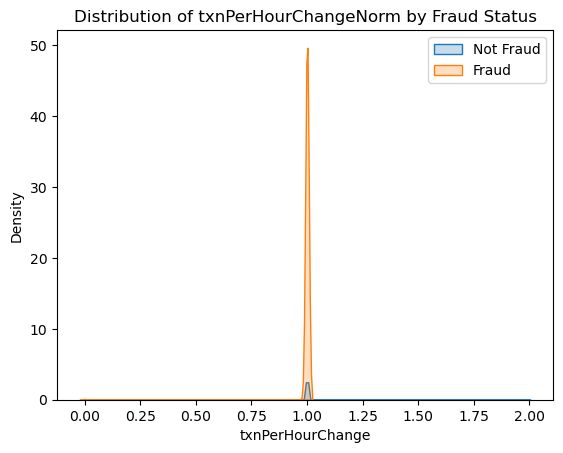

In [51]:
sns.kdeplot(data=df[df['isFraud']==0], x='txnPerHourChange', label='Not Fraud', shade=True)
sns.kdeplot(data=df[df['isFraud']==1], x='txnPerHourChange', label='Fraud', shade=True)
plt.legend()
plt.title('Distribution of txnPerHourChangeNorm by Fraud Status')
plt.show()

In [70]:
# txnPerHourChange distribution stats
fraud_stats = df[df['isFraud']==1]['txnPerHourChange'].describe()
non_fraud_stats = df[df['isFraud']==0]['txnPerHourChange'].describe()

In [15]:
# Ordinal encoding for 'type'
mapping = {'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 1, 'DEBIT': 0, 'CASH_IN': 0}
df['type'] = df['type'].map(mapping)

In [20]:
# one hot encoding for type
df = pd.get_dummies(df, columns=['type'], prefix='type')

In [15]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,isWeekend,dailyVolume,cumulativeVolume,dayCount,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio,isFirstTransaction,type_CASH_OUT,type_TRANSFER
1400497,249,244486.46,C1000000639,8946.00,0.00,C785826240,526950.37,771436.84,0,0,...,0,244486.46,244486.46,1,244486.46,0.0,2.444865e+11,1,True,False
1990093,327,211189.64,C1000004053,0.00,0.00,C1128041097,2609840.34,2821029.98,0,0,...,1,211189.64,211189.64,1,211189.64,0.0,2.111896e+11,1,True,False
375786,41,93865.13,C1000004530,351422.72,257557.59,C1643839147,178083.14,271948.26,0,0,...,0,93865.13,93865.13,1,93865.13,0.0,9.386513e+10,1,True,False
1237823,226,3228390.11,C1000005353,24996.00,0.00,C292963054,878327.64,4106717.75,0,0,...,0,3228390.11,3228390.11,1,3228390.11,0.0,3.228390e+12,1,False,True
969635,185,233109.79,C1000005555,20623.00,0.00,C1091802600,0.00,233109.79,0,0,...,0,233109.79,233109.79,1,233109.79,0.0,2.331098e+11,1,True,False


In [40]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'hourOfDay', 'dayOfMonth', 'isWeekend', 'dailyVolume',
       'cumulativeVolume', 'dayCount', 'avgDailyVolumeSoFar',
       'avgDailyVolumeBeforeTxn', 'amountToAvgVolumeRatio',
       'isFirstTransaction'],
      dtype='object')

In [37]:
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 
            'amountToOldBalanceOrgRatio', 'dailyVolume', 'cumulativeVolume','avgDailyVolumeSoFar',
            'avgDailyVolumeBeforeTxn', 'amountToAvgVolumeRatio']:
    df[col] = np.log1p(df[col])

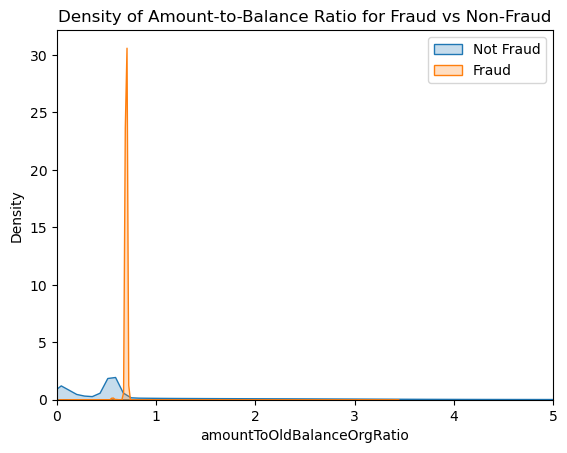

In [21]:
# amountToOldBalanceOrgRatio vs isFraud
sns.kdeplot(df[df["isFraud"]==0]["amountToOldBalanceOrgRatio"], label="Not Fraud", fill=True)
sns.kdeplot(df[df["isFraud"]==1]["amountToOldBalanceOrgRatio"], label="Fraud", fill=True)
plt.xlim(0, 5)
plt.title("Density of Amount-to-Balance Ratio for Fraud vs Non-Fraud")
plt.legend()
plt.show()

In [41]:
drop_cols = ['nameOrig', 'nameDest', 'step', 'isFlaggedFraud', 
             'newbalanceDest', 'newbalanceOrig','oldbalanceDest',
             'cumulativeVolume', 'dayCount', 'dailyVolume'
          ]   

In [42]:
df_copy = df.copy()
df_copy = df_copy.sort_values(by='step')

In [43]:
df_copy.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'hourOfDay', 'dayOfMonth', 'isWeekend', 'dailyVolume',
       'cumulativeVolume', 'dayCount', 'avgDailyVolumeSoFar',
       'avgDailyVolumeBeforeTxn', 'amountToAvgVolumeRatio',
       'isFirstTransaction'],
      dtype='object')

<Axes: xlabel='amount', ylabel='Density'>

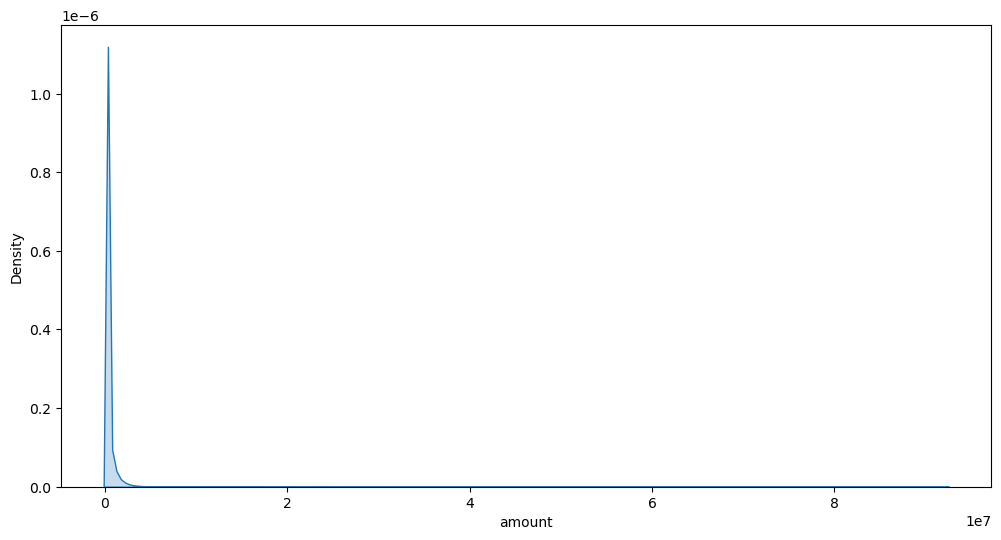

In [21]:
# Plot amount distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_copy, x='amount',fill=True)

<Axes: xlabel='oldbalanceOrg', ylabel='Density'>

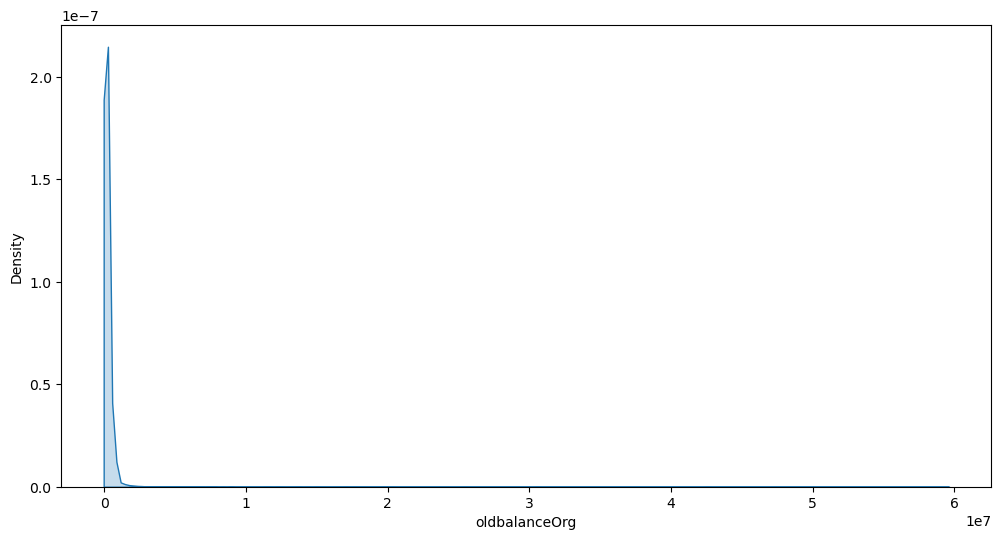

In [22]:
# Plot oldbalanceOrg distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_copy, x='oldbalanceOrg',fill=True)

<Axes: xlabel='avgDailyVolumeSoFar', ylabel='Density'>

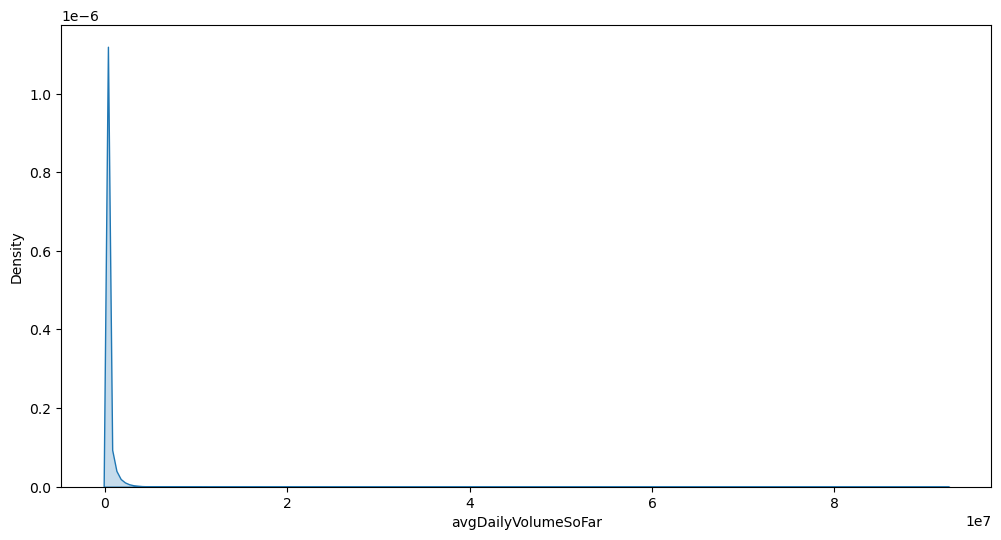

In [24]:
# Plot avgDailyVolumeSoFar distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_copy, x='avgDailyVolumeSoFar',fill=True)

<Axes: xlabel='avgDailyVolumeBeforeTxn', ylabel='Density'>

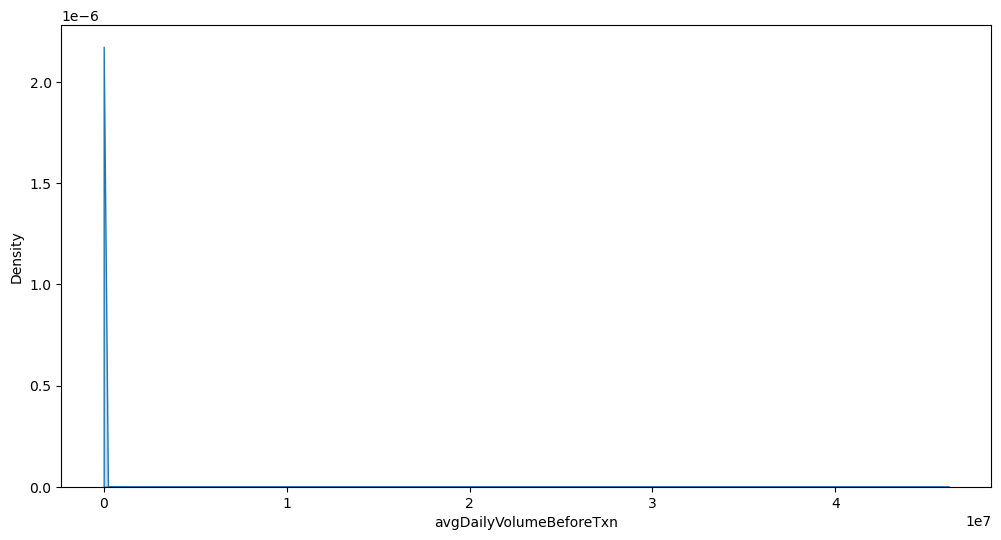

In [25]:
# Plot avgDailyVolumeBeforeTxn distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_copy, x='avgDailyVolumeBeforeTxn',fill=True)

<Axes: xlabel='amountToAvgVolumeRatio', ylabel='Density'>

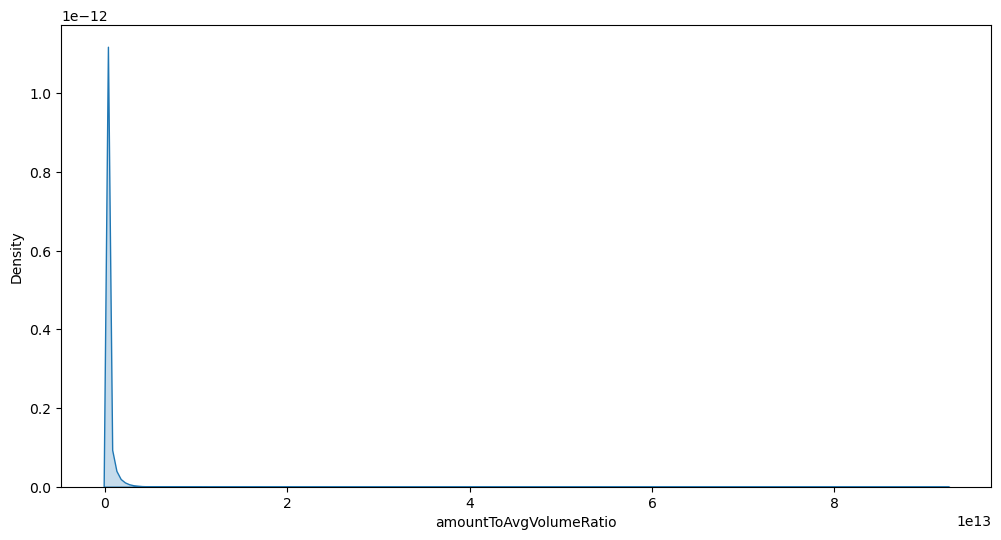

In [26]:
# Plot amountToAvgVolumeRatio distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_copy, x='amountToAvgVolumeRatio',fill=True)

In [18]:
for col in ['amount', 'oldbalanceOrg', 'avgDailyVolumeSoFar', 
            'avgDailyVolumeBeforeTxn', 'amountToAvgVolumeRatio']:
    df_copy[col] = np.log1p(df_copy[col])

<Axes: xlabel='amountToAvgVolumeRatio', ylabel='Density'>

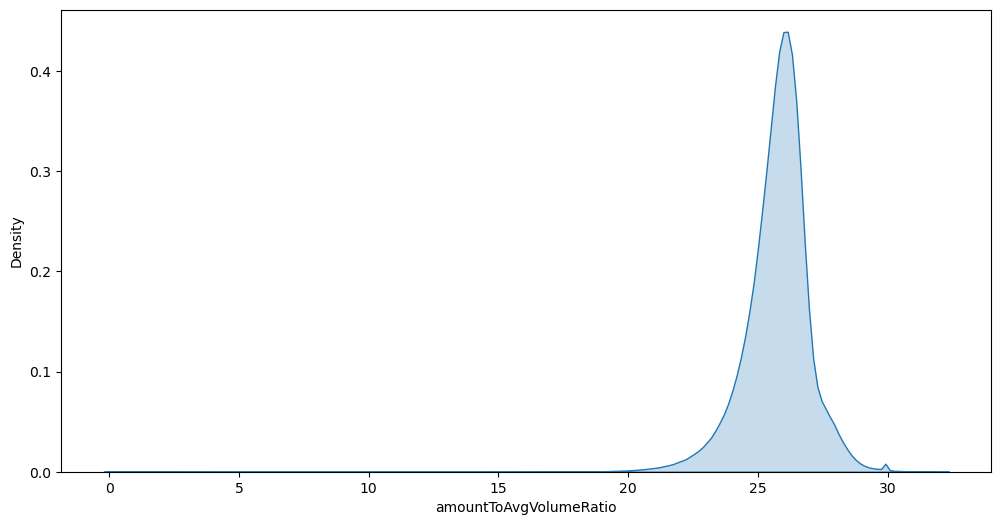

In [35]:
# Plot avgDailyVolumeBeforeTxn distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_copy, x='amountToAvgVolumeRatio',fill=True)

In [44]:
X = df_copy.drop(columns=drop_cols, axis=1)
y = df_copy['isFraud']

In [45]:
X.head()

,type,amount,oldbalanceOrg,isFraud,hourOfDay,dayOfMonth,isWeekend,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio,isFirstTransaction
202,CASH_OUT,596617.87,0.00,0,1,0,0,596617.87,0.0,5.966179e+11,1
189,TRANSFER,100588.80,18913.68,0,1,0,0,100588.80,0.0,1.005888e+11,1
256,CASH_OUT,497424.19,0.00,0,1,0,0,497424.19,0.0,4.974242e+11,1
557,TRANSFER,38829.90,708735.91,0,1,0,0,38829.90,0.0,3.882990e+10,1
311,CASH_OUT,39485.21,0.00,0,1,0,0,39485.21,0.0,3.948521e+10,1


In [46]:
cutoff = int(0.8 * len(X))

train_df = X.iloc[:cutoff]
test_df = X.iloc[cutoff:]

X_train = train_df.drop('isFraud', axis=1)
y_train = train_df['isFraud']

X_test = test_df.drop('isFraud', axis=1)
y_test = test_df['isFraud']

In [26]:
X_train_normal = X_train[y_train==0]

In [27]:
X_train_normal.shape

(2212373, 11)

In [28]:
# percentage in dataset that is fraud vs non fraud
print(f"Fraudulent transactions: {y_train.sum()} out of {len(y_train)} ({(y_train.sum()/len(y_train))*100:.4f}%)")

Fraudulent transactions: 3954 out of 2216327 (0.1784%)


In [29]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, f1_score

clf = IsolationForest(
    n_estimators=500,  
    max_samples=0.7,
    contamination=0.003,  
    max_features=1.0,
    bootstrap=False,
    random_state=42
)

clf.fit(X_train_normal)

IsolationForest(contamination=0.003, max_samples=0.7, n_estimators=500,
                random_state=42)

In [30]:
train_pred = (clf.predict(X_train) == -1).astype(int)
test_pred = (clf.predict(X_test) == -1).astype(int)

In [31]:
X_train['anomaly_score'] = -clf.decision_function(X_train)
X_test['anomaly_score'] = -clf.decision_function(X_test)

In [32]:
X_train.head()

,amount,oldbalanceOrg,hourOfDay,dayOfMonth,isWeekend,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio,isFirstTransaction,type_CASH_OUT,type_TRANSFER,anomaly_score
202,596617.87,0.00,1,0,0,596617.87,0.0,5.966179e+11,1,True,False,0.010000
189,100588.80,18913.68,1,0,0,100588.80,0.0,1.005888e+11,1,False,True,-0.038852
256,497424.19,0.00,1,0,0,497424.19,0.0,4.974242e+11,1,True,False,-0.017962
557,38829.90,708735.91,1,0,0,38829.90,0.0,3.882990e+10,1,False,True,0.029293
311,39485.21,0.00,1,0,0,39485.21,0.0,3.948521e+10,1,True,False,-0.058805


In [33]:
train_df = X_train.assign(isFraud=y_train, pred=train_pred)
test_df = X_test.assign(isFraud=y_test, pred=test_pred)

In [34]:
df_copy = pd.concat([train_df, test_df], axis=0)

In [35]:
df_copy.head()

,amount,oldbalanceOrg,hourOfDay,dayOfMonth,isWeekend,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio,isFirstTransaction,type_CASH_OUT,type_TRANSFER,anomaly_score,isFraud,pred
202,596617.87,0.00,1,0,0,596617.87,0.0,5.966179e+11,1,True,False,0.010000,0,1
189,100588.80,18913.68,1,0,0,100588.80,0.0,1.005888e+11,1,False,True,-0.038852,0,0
256,497424.19,0.00,1,0,0,497424.19,0.0,4.974242e+11,1,True,False,-0.017962,0,0
557,38829.90,708735.91,1,0,0,38829.90,0.0,3.882990e+10,1,False,True,0.029293,0,1
311,39485.21,0.00,1,0,0,39485.21,0.0,3.948521e+10,1,True,False,-0.058805,0,0


In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_copy['isFraud'], df_copy['pred'])
print(cm)


[[2752320    9876]
 [   4372    3841]]


In [37]:
from sklearn.metrics import classification_report

print(classification_report(df_copy['isFraud'], df_copy['pred'], digits=4))


              precision    recall  f1-score   support

           0     0.9984    0.9964    0.9974   2762196
           1     0.2800    0.4677    0.3503      8213

    accuracy                         0.9949   2770409
   macro avg     0.6392    0.7320    0.6739   2770409
weighted avg     0.9963    0.9949    0.9955   2770409



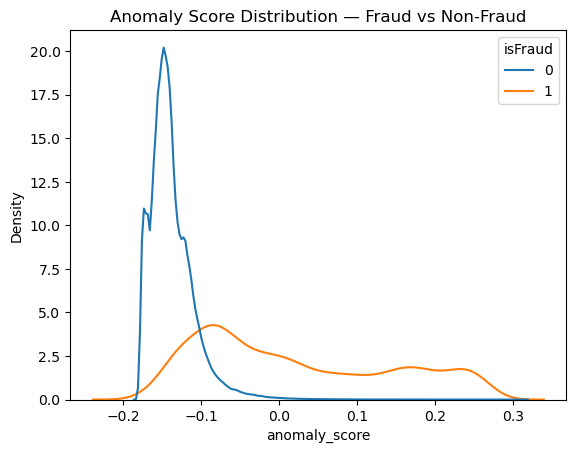

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df_copy, x='anomaly_score', hue='isFraud', common_norm=False)
plt.title("Anomaly Score Distribution — Fraud vs Non-Fraud")
plt.show()


In [49]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(df_copy['anomaly_score'].min(), df_copy['anomaly_score'].max(), 50)
for t in thresholds:
    preds = (X_train['anomaly_score'] > t).astype(int)
    recall = recall_score(y_train, preds)
    f1 = f1_score(y_train, preds)
    print(f"Threshold {t:.4f} → Recall: {recall:.3f}, F1 Score: {f1:.3f}")

Threshold -0.1981 → Recall: 1.000, F1 Score: 0.004
Threshold -0.1896 → Recall: 1.000, F1 Score: 0.004
Threshold -0.1811 → Recall: 0.994, F1 Score: 0.004
Threshold -0.1726 → Recall: 0.978, F1 Score: 0.005
Threshold -0.1640 → Recall: 0.962, F1 Score: 0.006
Threshold -0.1555 → Recall: 0.944, F1 Score: 0.007
Threshold -0.1470 → Recall: 0.925, F1 Score: 0.009
Threshold -0.1385 → Recall: 0.907, F1 Score: 0.011
Threshold -0.1300 → Recall: 0.882, F1 Score: 0.015
Threshold -0.1214 → Recall: 0.844, F1 Score: 0.019
Threshold -0.1129 → Recall: 0.808, F1 Score: 0.024
Threshold -0.1044 → Recall: 0.774, F1 Score: 0.031
Threshold -0.0959 → Recall: 0.734, F1 Score: 0.040
Threshold -0.0873 → Recall: 0.699, F1 Score: 0.050
Threshold -0.0788 → Recall: 0.662, F1 Score: 0.062
Threshold -0.0703 → Recall: 0.620, F1 Score: 0.076
Threshold -0.0618 → Recall: 0.585, F1 Score: 0.091
Threshold -0.0533 → Recall: 0.551, F1 Score: 0.109
Threshold -0.0447 → Recall: 0.522, F1 Score: 0.129
Threshold -0.0362 → Recall: 0.4

In [50]:
best_thresh = -0.0192
df_copy['pred_opt'] = (df_copy['anomaly_score'] > best_thresh).astype(int)


In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_copy['isFraud'], df_copy['pred_opt'])
print(cm)


[[2742717   19479]
 [   4299    3914]]


In [52]:
from sklearn.metrics import classification_report

print(classification_report(df_copy['isFraud'], df_copy['pred_opt'], digits=4))


              precision    recall  f1-score   support

           0     0.9984    0.9929    0.9957   2762196
           1     0.1673    0.4766    0.2477      8213

    accuracy                         0.9914   2770409
   macro avg     0.5829    0.7348    0.6217   2770409
weighted avg     0.9960    0.9914    0.9935   2770409



In [53]:
df["is_anomaly"] = (df["anomaly_score"] < best_thresh).astype(int)


KeyError: 'anomaly_score'

In [54]:
df_copy['score_shifted'] = df_copy['anomaly_score'] - best_thresh


In [55]:
df_copy.columns

Index(['amount', 'oldbalanceOrg', 'hourOfDay', 'dayOfMonth', 'isWeekend',
       'avgDailyVolumeSoFar', 'avgDailyVolumeBeforeTxn',
       'amountToAvgVolumeRatio', 'isFirstTransaction', 'type_CASH_OUT',
       'type_TRANSFER', 'anomaly_score', 'isFraud', 'pred', 'pred_opt',
       'score_shifted'],
      dtype='object')

In [56]:
# drop_cols.extend(['anomaly_score', 'pred', 'pred_opt'])
drop_cols = ['anomaly_score', 'pred', 'pred_opt']
X_sup = df_copy.drop(columns=drop_cols, axis=1)

In [57]:
X_sup.columns

Index(['amount', 'oldbalanceOrg', 'hourOfDay', 'dayOfMonth', 'isWeekend',
       'avgDailyVolumeSoFar', 'avgDailyVolumeBeforeTxn',
       'amountToAvgVolumeRatio', 'isFirstTransaction', 'type_CASH_OUT',
       'type_TRANSFER', 'isFraud', 'score_shifted'],
      dtype='object')

In [85]:
for col in ['amount', 'oldbalanceOrg']:
    X_sup[col] = np.log1p(X_sup[col])

In [58]:
cutoff = int(0.8 * len(X_sup))

train_df = X_sup.iloc[:cutoff]
test_df = X_sup.iloc[cutoff:]

X_train = train_df.drop('isFraud', axis=1)
y_train = train_df['isFraud']

X_test = test_df.drop('isFraud', axis=1)
y_test = test_df['isFraud']

In [59]:
y_test.shape

(554082,)

In [73]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    scale_pos_weight=20,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

In [74]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [75]:


y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    549823
           1       0.64      0.77      0.70      4259

    accuracy                           0.99    554082
   macro avg       0.82      0.88      0.85    554082
weighted avg       1.00      0.99      1.00    554082

ROC-AUC Score: 0.9952206218272408


In [63]:
X_train.columns

Index(['amount', 'oldbalanceOrg', 'hourOfDay', 'dayOfMonth', 'isWeekend',
       'avgDailyVolumeSoFar', 'avgDailyVolumeBeforeTxn',
       'amountToAvgVolumeRatio', 'isFirstTransaction', 'type_CASH_OUT',
       'type_TRANSFER', 'score_shifted'],
      dtype='object')

In [81]:
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]

In [144]:
test = df_copy.groupby('isFraud')['amountToOldBalanceOrgRatio'].describe()
print(test)

             count        mean          std       min       25%       50%  \
isFraud                                                                     
0        2762196.0  148.670133  4967.821376  0.000003  5.099286  5.693693   
1           8213.0    1.022203     0.507184  0.038373  1.000000  1.000000   

              75%           max  
isFraud                          
0        6.540414  3.925476e+06  
1        1.000000  2.952662e+01  


In [86]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresh = precision_recall_curve(y_test, y_pred_proba)


T_high = thresh[next(i for i, p in enumerate(prec) if p >= 0.90)]


T_low = thresh[next(i for i, r in enumerate(rec) if r >= 0.60)]

print("T_low:", T_low)
print("T_high:", T_high)


T_low: 6.3815974e-06
T_high: 0.8204885


In [95]:
y_pred_final = (y_pred_proba >= T_high).astype(int)
print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    549823
           1       0.90      0.61      0.73      4259

    accuracy                           1.00    554082
   macro avg       0.95      0.81      0.86    554082
weighted avg       1.00      1.00      1.00    554082



In [97]:
import pandas as pd
from sklearn.metrics import precision_recall_curve

prec, rec, thresh = precision_recall_curve(y_test, y_pred_proba)

df_pr = pd.DataFrame({
    "threshold": list(thresh) + [1],  # align lengths
    "precision": prec,
    "recall": rec
})


df_pr = df_pr[(df_pr["recall"] >= 0.60) & (df_pr["precision"] >= 0.50)]

df_pr.sort_values("recall", ascending=False).head(10)


,threshold,precision,recall
59858,0.316196,0.500000,0.848086
59866,0.317625,0.501110,0.848086
59872,0.318495,0.501667,0.848086
59871,0.318371,0.501597,0.848086
59870,0.318015,0.501388,0.848086
59869,0.318003,0.501319,0.848086
59868,0.317810,0.501249,0.848086
59867,0.317776,0.501179,0.848086
59859,0.316549,0.500069,0.848086
59865,0.317544,0.501040,0.848086


In [98]:
T_low = 0.316196

In [99]:
y_pred_final = (y_pred_proba >= T_low).astype(int)
print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    549823
           1       0.50      0.85      0.63      4259

    accuracy                           0.99    554082
   macro avg       0.75      0.92      0.81    554082
weighted avg       0.99      0.99      0.99    554082



In [102]:
feature_order = list(X_test.columns)

In [103]:
feature_order

['amount',
 'oldbalanceOrg',
 'hourOfDay',
 'dayOfMonth',
 'isWeekend',
 'avgDailyVolumeSoFar',
 'avgDailyVolumeBeforeTxn',
 'amountToAvgVolumeRatio',
 'isFirstTransaction',
 'type_CASH_OUT',
 'type_TRANSFER',
 'score_shifted']

In [38]:
import joblib
joblib.dump(clf, "../model/iso.pkl", compress=3)

['../model/iso.pkl']

In [108]:
joblib.dump(xgb_model, "../model/xgb.pkl")

['../model/xgb.pkl']

In [115]:
import json
json.dump(feature_order, open("feature_order.json","w"))

: 

In [47]:
csv_copy = X_test.copy()

In [48]:
csv_copy.columns

Index(['type', 'amount', 'oldbalanceOrg', 'hourOfDay', 'dayOfMonth',
       'isWeekend', 'avgDailyVolumeSoFar', 'avgDailyVolumeBeforeTxn',
       'amountToAvgVolumeRatio', 'isFirstTransaction'],
      dtype='object')

In [49]:
true_fraud_csv = csv_copy[y_test==1]

In [50]:
not_fraud_csv = csv_copy[y_test==0]

In [27]:
sample_csv = X_test.drop(['hourOfDay',
                          'dayOfMonth',
                          'isWeekend',
                          ], axis=1).head(10)

In [51]:
sample_csv_fraud = true_fraud_csv.drop(['hourOfDay',
                          'dayOfMonth',
                          'isWeekend',
                          ], axis=1).head(10)

In [52]:
sample_csv_not_fraud = not_fraud_csv.drop(['hourOfDay',
                          'dayOfMonth',
                          'isWeekend',
                          ], axis=1).head(10)

In [53]:
# Add random timestamp column
import random
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def random_dates(start, end, n):
    start_u = start.value // 10**9
    end_u = end.value // 10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

In [29]:
n_samples = sample_csv.shape[0]
sample_csv['timestamp'] = random_dates(pd.to_datetime('2021-01-01'), pd.to_datetime('2024-01-01'), n_samples)
sample_csv = sample_csv[['timestamp'] + [col for col in sample_csv.columns if col != 'timestamp']]

In [30]:
sample_csv.head()

,timestamp,type,amount,oldbalanceOrg,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio,isFirstTransaction
2202819,2022-03-24 17:41:52,CASH_OUT,112544.49,0.0,112544.49,0.0,1.125445e+11,1
2202959,2022-11-02 21:54:51,CASH_OUT,521085.24,1275.0,521085.24,0.0,5.210852e+11,1
2202931,2022-08-07 23:20:40,CASH_OUT,203535.82,20276.0,203535.82,0.0,2.035358e+11,1
2204093,2022-10-09 02:54:45,CASH_OUT,238016.37,5684.0,238016.37,0.0,2.380164e+11,1
2217390,2021-07-06 08:45:43,CASH_OUT,408939.16,323798.0,408939.16,0.0,4.089392e+11,1


In [31]:
sample_csv.to_csv("../data/sample_input.csv", index=False)

In [54]:
n_samples = sample_csv_fraud.shape[0]
sample_csv_fraud['timestamp'] = random_dates(pd.to_datetime('2021-01-01'), pd.to_datetime('2024-01-01'), n_samples)
sample_csv_fraud = sample_csv_fraud[['timestamp'] + [col for col in sample_csv_fraud.columns if col != 'timestamp']]

In [55]:
n_samples = sample_csv_not_fraud.shape[0]
sample_csv_not_fraud['timestamp'] = random_dates(pd.to_datetime('2021-01-01'), pd.to_datetime('2024-01-01'), n_samples)
sample_csv_not_fraud = sample_csv_not_fraud[['timestamp'] + [col for col in sample_csv_not_fraud.columns if col != 'timestamp']]

In [56]:
sample_csv_not_fraud.head()

,timestamp,type,amount,oldbalanceOrg,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio,isFirstTransaction
2202819,2021-12-24 21:26:47,CASH_OUT,112544.49,0.0,112544.49,0.0,1.125445e+11,1
2202959,2022-01-29 05:07:27,CASH_OUT,521085.24,1275.0,521085.24,0.0,5.210852e+11,1
2202931,2022-04-24 08:03:20,CASH_OUT,203535.82,20276.0,203535.82,0.0,2.035358e+11,1
2204093,2022-03-15 11:54:31,CASH_OUT,238016.37,5684.0,238016.37,0.0,2.380164e+11,1
2217390,2022-04-13 08:37:47,CASH_OUT,408939.16,323798.0,408939.16,0.0,4.089392e+11,1


In [57]:
sample_csv_fraud.head()

,timestamp,type,amount,oldbalanceOrg,avgDailyVolumeSoFar,avgDailyVolumeBeforeTxn,amountToAvgVolumeRatio,isFirstTransaction
2206750,2022-10-16 14:11:47,CASH_OUT,69878.14,69878.14,69878.14,0.0,6.987814e+10,1
2232222,2023-07-12 06:31:10,CASH_OUT,42483.97,42483.97,42483.97,0.0,4.248397e+10,1
2237813,2023-12-16 22:47:31,TRANSFER,883366.69,883366.69,883366.69,0.0,8.833667e+11,1
2237814,2023-03-06 09:10:45,CASH_OUT,883366.69,883366.69,883366.69,0.0,8.833667e+11,1
2223473,2021-11-29 11:34:12,TRANSFER,3592596.97,3592596.97,3592596.97,0.0,3.592597e+12,1


In [58]:
sample_csv_fraud.to_csv("../data/fraud_input.csv", index=False)

In [59]:
sample_csv_not_fraud.to_csv("../data/not_fraud_input.csv", index=False)